<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from datetime import datetime

In [4]:
df = pd.read_csv('../data/AirPassengers.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df['fecha']  = pd.to_datetime(df.Month)

In [7]:
df.rename(columns={'#Passengers':'passengers'}, inplace=True)

In [8]:
df.set_index('fecha', inplace=True)

In [9]:
plt.rcParams['figure.figsize'] = (12,8)

<AxesSubplot:xlabel='fecha'>

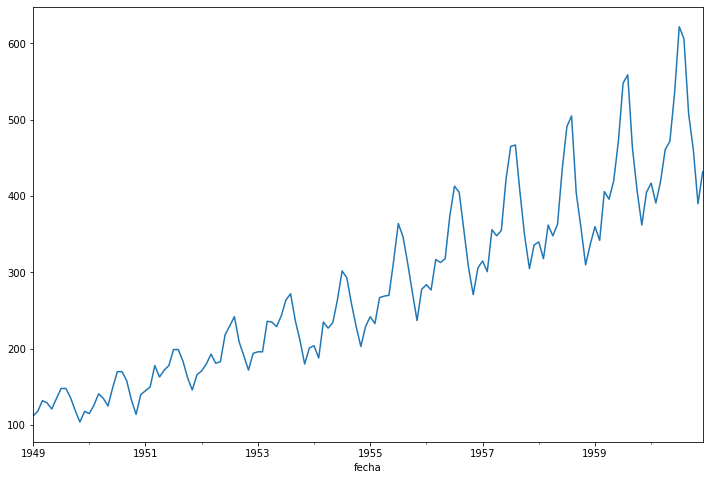

In [10]:
df['passengers'].plot()

In [11]:
ts = df['passengers']

In [12]:
decomposition = seasonal_decompose(ts)

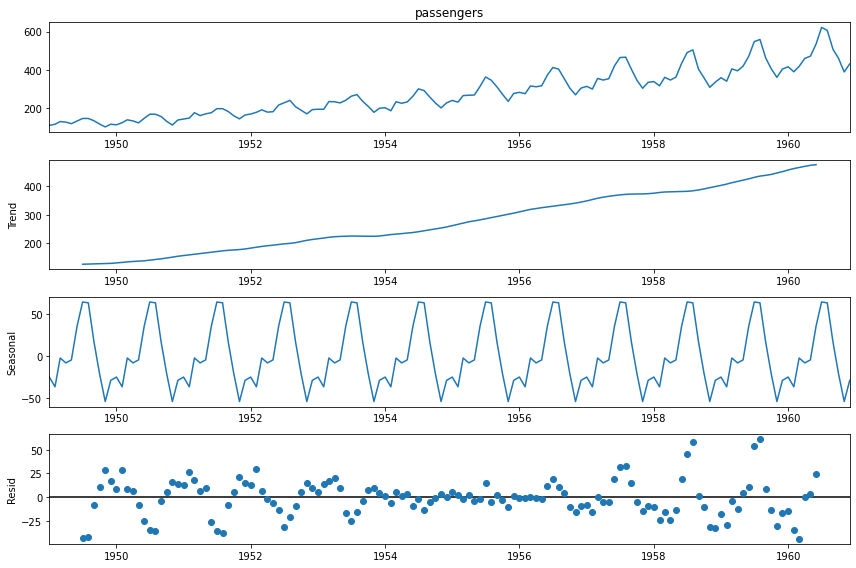

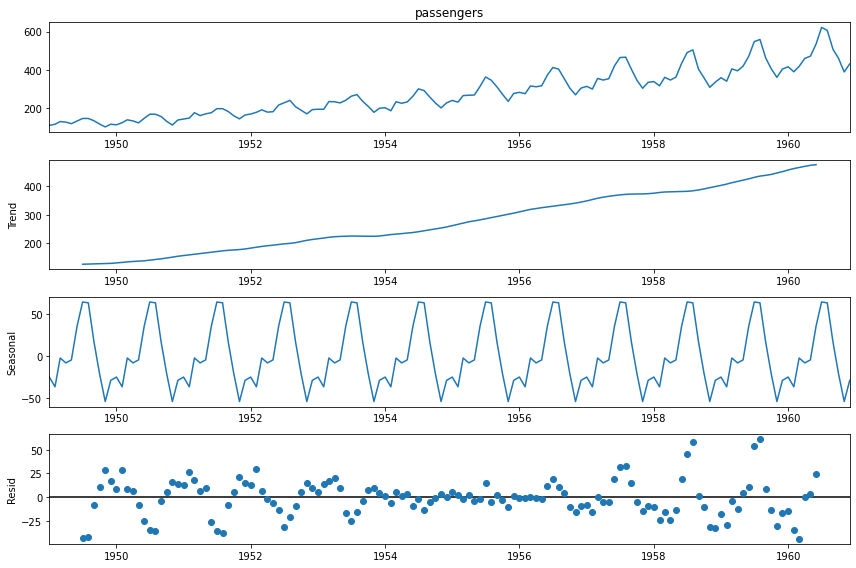

In [13]:
decomposition.plot()

In [14]:
dir(decomposition)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_observed',
 '_resid',
 '_seasonal',
 '_trend',
 '_weights',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend',
 'weights']

In [15]:
decomposition.trend

fecha
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [16]:
decomposition.seasonal

fecha
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

<AxesSubplot:xlabel='fecha'>

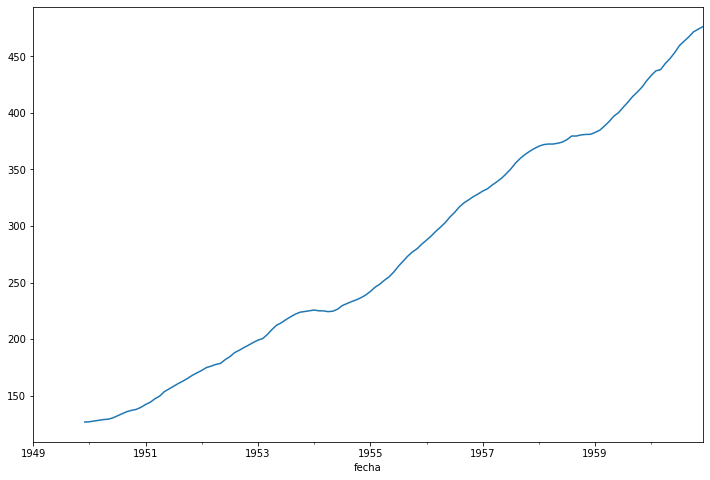

In [17]:
ts.rolling(12).mean().plot()

In [18]:
adfuller(ts)

(0.8153688792060418,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [19]:
adfuller(ts.diff().dropna())

(-2.829266824169997,
 0.05421329028382577,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854085)

In [20]:
adfuller(ts.diff().diff().dropna())

(-16.384231542468513,
 2.7328918500142026e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.6020417275599)

In [21]:
adfuller(decomposition.resid.dropna())

(-5.298427587050735,
 5.516868902226193e-06,
 13,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 849.940140147128)

In [22]:
help(SARIMAX)

Help on class SARIMAX in module statsmodels.tsa.statespace.sarimax:

class SARIMAX(statsmodels.tsa.statespace.mlemodel.MLEModel)
 |  SARIMAX(endog, exog=None, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, measurement_error=False, time_varying_regression=False, mle_regression=True, simple_differencing=False, enforce_stationarity=True, enforce_invertibility=True, hamilton_representation=False, concentrate_scale=False, trend_offset=1, use_exact_diffuse=False, dates=None, freq=None, missing='none', validate_specification=True, **kwargs)
 |  
 |  Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors
 |  model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The observed time-series process :math:`y`
 |  exog : array_like, optional
 |      Array of exogenous regressors, shaped nobs x k.
 |  order : iterable or iterable of iterables, optional
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA p

In [23]:
params = (2,1,2)
sparams = (2,1,2,12)

model = SARIMAX(ts, order=params, seasonal_order=sparams, enforce_stationarity=True, freq='MS')

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [24]:
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51680D+00    |proj g|=  9.55359D-02


 This problem is unconstrained.



At iterate    5    f=  3.50475D+00    |proj g|=  1.89299D-02

At iterate   10    f=  3.49623D+00    |proj g|=  4.29030D-02

At iterate   15    f=  3.48495D+00    |proj g|=  7.24142D-03

At iterate   20    f=  3.47970D+00    |proj g|=  1.27455D-02

At iterate   25    f=  3.47870D+00    |proj g|=  1.25640D-03

At iterate   30    f=  3.47776D+00    |proj g|=  5.82911D-03

At iterate   35    f=  3.47330D+00    |proj g|=  2.90770D-02

At iterate   40    f=  3.46774D+00    |proj g|=  5.27920D-02

At iterate   45    f=  3.46332D+00    |proj g|=  4.53609D-03

At iterate   50    f=  3.45999D+00    |proj g|=  9.71792D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -498.239
Date:                            Fri, 14 Jan 2022   AIC                           1014.479
Time:                                    23:30:49   BIC                           1040.355
Sample:                                01-01-1949   HQIC                          1024.993
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7563      0.458      1.652      0.099      -0.141       1.654
ar.L2          0.0982      0.366      0.269      0.788      -0.619       0.815
ma.L1         -1.1948      0.426     -2.806      0.005      -2.029      -0.360
ma.L2          0.2077      0.416      0.499      0.618      -0.608       1.023
ar.S.L12       1.3563      0.407      3.330      0.001       0.558       2.155
ar.S.L24      -0.4465      0.528     -0.846      0.398      -1.481       0.588
ma.S.L12      -1.6807      0.817     -2.057      0.040      -3.282      -0.079
ma.S.L24       0.8733      0.998      0.875      0.381      -1.082       2.829
sigma2       102.3778     55.536      1.843      0.065      -6.470     211.226
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                14.63
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.61   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

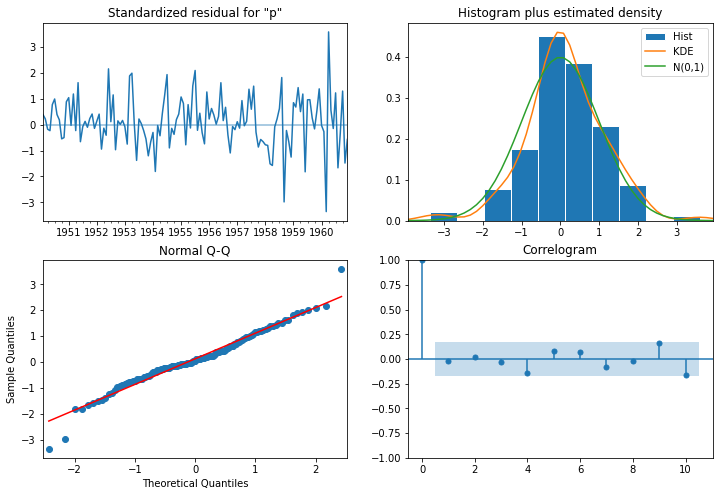

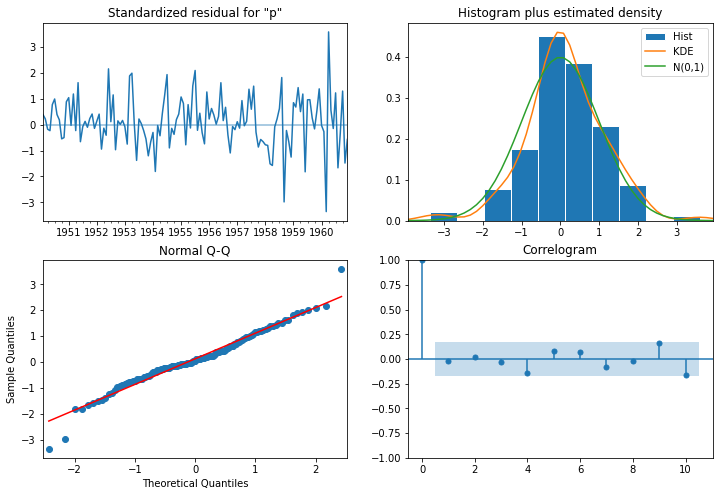

In [26]:
results.plot_diagnostics()

<AxesSubplot:xlabel='fecha'>

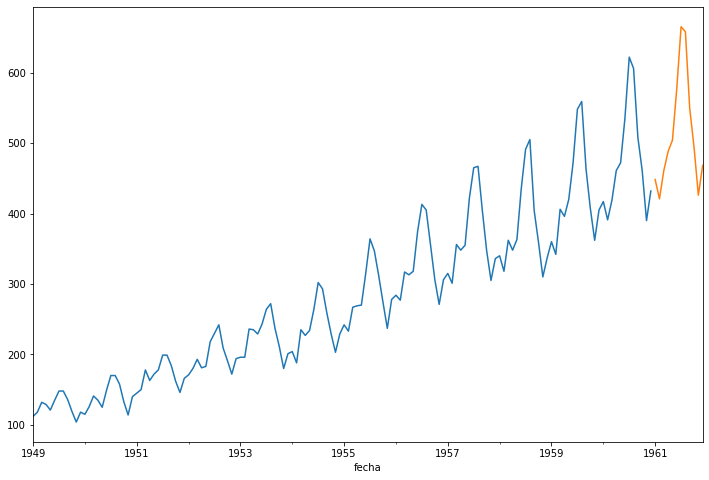

In [27]:
ts.plot()
results.get_prediction(start='1961-01-01', end='1961-12-01').predicted_mean.plot()

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


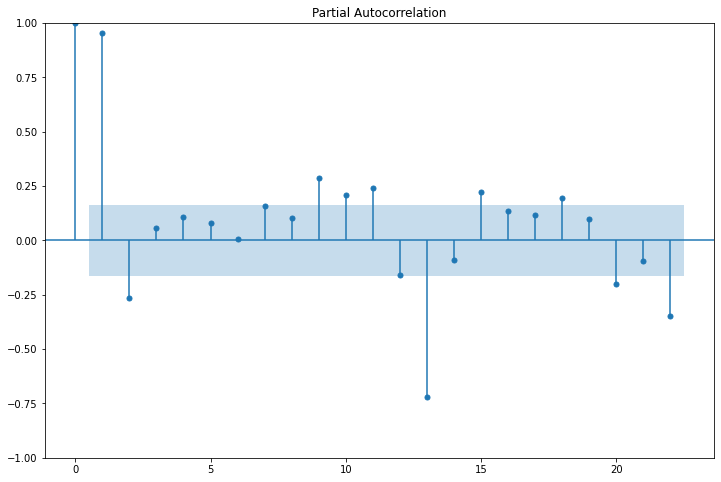

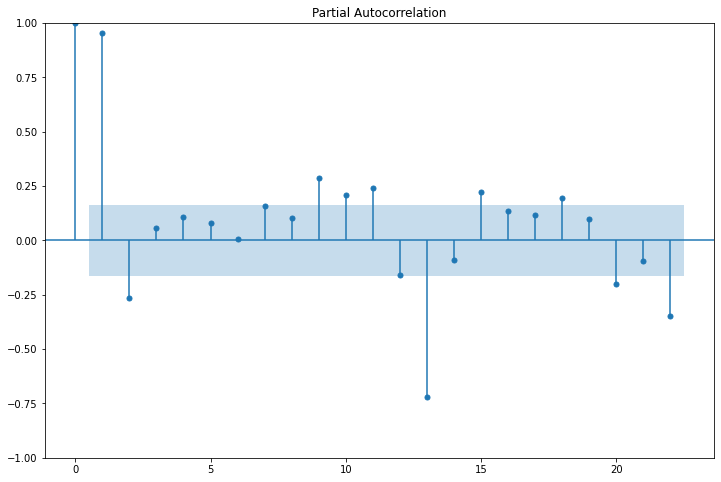

In [28]:
plot_pacf(ts)

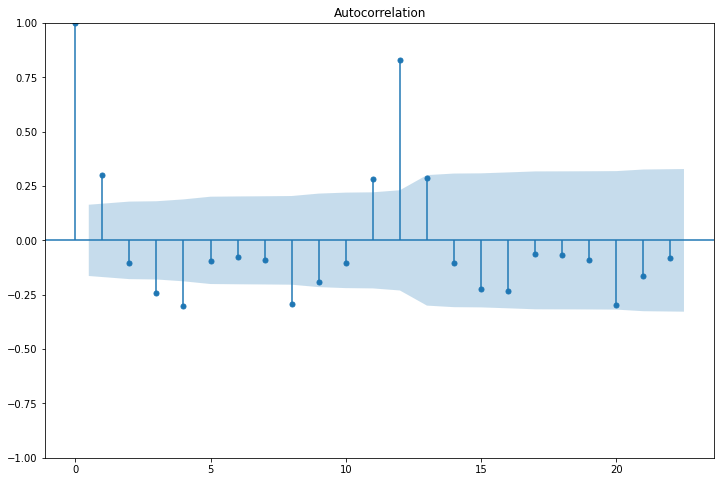

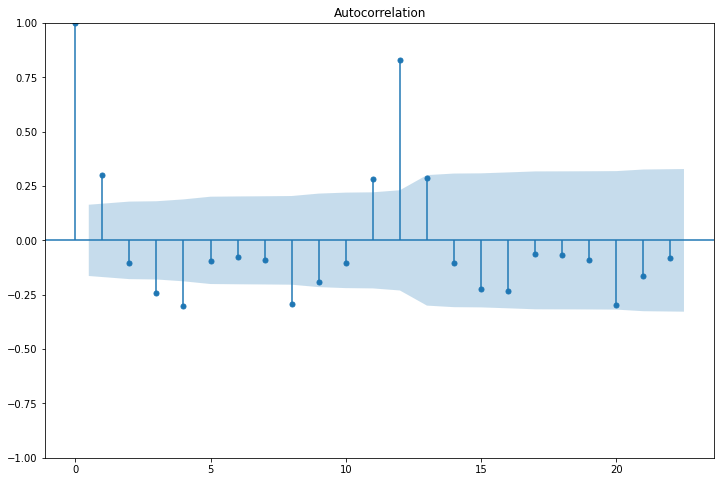

In [29]:
plot_acf(ts.diff().dropna())

In [30]:
import itertools

In [31]:
p = [1,2]
d = [1,2]
q = [1,2]
s = [12]

In [32]:
list(itertools.product(p,d,q))

[(1, 1, 1),
 (1, 1, 2),
 (1, 2, 1),
 (1, 2, 2),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 1),
 (2, 2, 2)]

In [33]:
p = [1,2]
d = [1,2]
q = [1,2]
s = [12]
for order in list(itertools.product(p,d,q)):
    for order_seasonal in list(itertools.product(p,d,q,s)):
        model = SARIMAX(ts, order=order, seasonal_order=order_seasonal, enforce_stationarity=True, freq='MS')
        results = model.fit()
        print('ARIMA{}x{} - AIC:{}'.format(order, order_seasonal, results.aic))
        

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52844D+00    |proj g|=  8.65844D-02

At iterate    5    f=  3.52337D+00    |proj g|=  3.73532D-02

At iterate   10    f=  3.51577D+00    |proj g|=  4.96152D-03

At iterate   15    f=  3.51498D+00    |proj g|=  1.97260D-03

At iterate   20    f=  3.51493D+00    |proj g|=  6.99996D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   3.592D-05   3.515D+00
  F =   3.5149263669792017     

CONVERG

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52055D+00    |proj g|=  8.71730D-02

At iterate    5    f=  3.51271D+00    |proj g|=  6.12345D-03

At iterate   10    f=  3.51127D+00    |proj g|=  8.20056D-03

At iterate   15    f=  3.50006D+00    |proj g|=  4.31365D-02

At iterate   20    f=  3.48423D+00    |proj g|=  1.14294D-02

At iterate   25    f=  3.48282D+00    |proj g|=  5.72599D-03

At iterate   30    f=  3.48261D+00    |proj g|=  7.74065D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.29366D+00    |proj g|=  5.10288D-02

At iterate   10    f=  3.24651D+00    |proj g|=  5.61727D-02

At iterate   15    f=  3.23269D+00    |proj g|=  4.17902D-04

At iterate   20    f=  3.23266D+00    |proj g|=  1.21965D-03

At iterate   25    f=  3.23255D+00    |proj g|=  1.76241D-03

At iterate   30    f=  3.23253D+00    |proj g|=  6.80351D-04

At iterate   35    f=  3.23252D+00    |proj g|=  3.38510D-05

At iterate   40    f=  3.23252D+00    |proj g|=  6.23059D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     55      1     0     0   3.412D-05   3.233D+00
  F =   3.23252403885

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.34401D+00    |proj g|=  2.48777D-02

At iterate   10    f=  3.27694D+00    |proj g|=  5.86087D-02

At iterate   15    f=  3.24168D+00    |proj g|=  2.02679D-02

At iterate   20    f=  3.23930D+00    |proj g|=  1.83178D-02

At iterate   25    f=  3.23255D+00    |proj g|=  3.19868D-02

At iterate   30    f=  3.22648D+00    |proj g|=  9.88305D-03

At iterate   35    f=  3.22586D+00    |proj g|=  7.31554D-03

At iterate   40    f=  3.22555D+00    |proj g|=  3.73521D-03

At iterate   45    f=  3.22547D+00    |proj g|=  9.63015D-04

At iterate   50    f=  3.22546D+00    |proj g|=  7.04964D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 2, 2, 12) - AIC:940.9313771635517
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51870D+00    |proj g|=  8.99040D-02


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.50936D+00    |proj g|=  1.49563D-02

At iterate   10    f=  3.49465D+00    |proj g|=  2.11517D-02

At iterate   15    f=  3.48745D+00    |proj g|=  8.14136D-03

At iterate   20    f=  3.48626D+00    |proj g|=  7.57759D-03

At iterate   25    f=  3.48586D+00    |proj g|=  3.65109D-03

At iterate   30    f=  3.48572D+00    |proj g|=  2.36570D-03

At iterate   35    f=  3.48563D+00    |proj g|=  9.71964D-04

At iterate   40    f=  3.48561D+00    |proj g|=  7.33006D-04

At iterate   45    f=  3.48561D+00    |proj g|=  1.67869D-04

At iterate   50    f=  3.48560D+00    |proj g|=  9.41309D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52053D+00    |proj g|=  9.09618D-02


 This problem is unconstrained.



At iterate    5    f=  3.51218D+00    |proj g|=  2.11658D-02

At iterate   10    f=  3.50098D+00    |proj g|=  1.44512D-02

At iterate   15    f=  3.49596D+00    |proj g|=  6.47228D-03

At iterate   20    f=  3.49477D+00    |proj g|=  8.81805D-03

At iterate   25    f=  3.49130D+00    |proj g|=  3.77899D-02

At iterate   30    f=  3.48618D+00    |proj g|=  3.99026D-02

At iterate   35    f=  3.47896D+00    |proj g|=  3.01834D-03

At iterate   40    f=  3.47808D+00    |proj g|=  2.87654D-03

At iterate   45    f=  3.47784D+00    |proj g|=  4.49664D-04

At iterate   50    f=  3.47778D+00    |proj g|=  3.99756D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.36467D+00    |proj g|=  4.18096D-02


 This problem is unconstrained.



At iterate    5    f=  3.30174D+00    |proj g|=  3.17507D-02

At iterate   10    f=  3.25277D+00    |proj g|=  1.11744D-01

At iterate   15    f=  3.23186D+00    |proj g|=  1.74079D-03

At iterate   20    f=  3.23185D+00    |proj g|=  5.71031D-04

At iterate   25    f=  3.23178D+00    |proj g|=  2.35510D-03

At iterate   30    f=  3.23172D+00    |proj g|=  5.01027D-04

At iterate   35    f=  3.23170D+00    |proj g|=  2.36914D-04

At iterate   40    f=  3.23170D+00    |proj g|=  1.74605D-04

At iterate   45    f=  3.23170D+00    |proj g|=  8.35309D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     57   

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.34932D+00    |proj g|=  5.73749D-02

At iterate   10    f=  3.28254D+00    |proj g|=  9.11331D-02

At iterate   15    f=  3.23398D+00    |proj g|=  1.46312D-02

At iterate   20    f=  3.23281D+00    |proj g|=  3.90255D-03

At iterate   25    f=  3.23216D+00    |proj g|=  3.04569D-03

At iterate   30    f=  3.22996D+00    |proj g|=  2.90086D-02

At iterate   35    f=  3.22802D+00    |proj g|=  2.48631D-03

At iterate   40    f=  3.22796D+00    |proj g|=  1.43089D-04

At iterate   45    f=  3.22796D+00    |proj g|=  5.31426D-05

At iterate   50    f=  3.22788D+00    |proj g|=  2.87271D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(2, 2, 2, 12) - AIC:943.628857694385
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.53070D+00    |proj g|=  8.76955D-02


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.52437D+00    |proj g|=  1.27551D-02

At iterate   10    f=  3.51541D+00    |proj g|=  4.39399D-03

At iterate   15    f=  3.51436D+00    |proj g|=  6.84264D-04

At iterate   20    f=  3.51432D+00    |proj g|=  1.05543D-03

At iterate   25    f=  3.51431D+00    |proj g|=  1.09529D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     30      1     0     0   3.698D-06   3.514D+00
  F =   3.5143103294933575     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:1024.121374894087


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52089D+00    |proj g|=  8.24627D-02

At iterate    5    f=  3.51327D+00    |proj g|=  9.01748D-03

At iterate   10    f=  3.51088D+00    |proj g|=  4.66780D-03

At iterate   15    f=  3.50935D+00    |proj g|=  1.04059D-01

At iterate   20    f=  3.48499D+00    |proj g|=  2.69138D-02

At iterate   25    f=  3.47300D+00    |proj g|=  5.77772D-03

At iterate   30    f=  3.46717D+00    |proj g|=  5.70095D-03

At iterate   35    f=  3.46665D+00    |proj g|=  1.14428D-03

At iterate   40    f=  3.46663D+00    |proj g|=  1.07157D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.24744D+00    |proj g|=  6.36176D-02

At iterate   10    f=  3.23311D+00    |proj g|=  1.28156D-03

At iterate   15    f=  3.23243D+00    |proj g|=  4.75596D-03

At iterate   20    f=  3.23233D+00    |proj g|=  1.11322D-04

At iterate   25    f=  3.23231D+00    |proj g|=  2.34780D-03

At iterate   30    f=  3.23227D+00    |proj g|=  6.86211D-04

At iterate   35    f=  3.23227D+00    |proj g|=  2.63262D-04

At iterate   40    f=  3.23227D+00    |proj g|=  8.79680D-05

At iterate   45    f=  3.23226D+00    |proj g|=  2.71516D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     55   

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.53904D+00    |proj g|=  2.07368D-01


 This problem is unconstrained.



At iterate    5    f=  3.34106D+00    |proj g|=  2.49101D-02

At iterate   10    f=  3.24366D+00    |proj g|=  5.33703D-02

At iterate   15    f=  3.23932D+00    |proj g|=  3.35589D-03

At iterate   20    f=  3.23699D+00    |proj g|=  3.87333D-02

At iterate   25    f=  3.22879D+00    |proj g|=  2.47824D-02

At iterate   30    f=  3.22642D+00    |proj g|=  7.83159D-03

At iterate   35    f=  3.22575D+00    |proj g|=  1.75170D-03

At iterate   40    f=  3.22554D+00    |proj g|=  4.32285D-03

At iterate   45    f=  3.22538D+00    |proj g|=  7.64437D-04

At iterate   50    f=  3.22536D+00    |proj g|=  3.35255D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 2)x(1, 2, 2, 12) - AIC:942.9046056844537
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52038D+00    |proj g|=  9.70897D-02


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.50975D+00    |proj g|=  1.10835D-02

At iterate   10    f=  3.49208D+00    |proj g|=  1.34904D-02

At iterate   15    f=  3.48940D+00    |proj g|=  6.57924D-03

At iterate   20    f=  3.48629D+00    |proj g|=  2.59695D-03

At iterate   25    f=  3.48584D+00    |proj g|=  1.14093D-03

At iterate   30    f=  3.48527D+00    |proj g|=  7.79821D-04

At iterate   35    f=  3.48525D+00    |proj g|=  2.25880D-04

At iterate   40    f=  3.48524D+00    |proj g|=  5.42006D-04

At iterate   45    f=  3.48522D+00    |proj g|=  6.97331D-04

At iterate   50    f=  3.48522D+00    |proj g|=  1.00424D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52084D+00    |proj g|=  8.60446D-02

At iterate    5    f=  3.51295D+00    |proj g|=  1.76368D-02

At iterate   10    f=  3.49826D+00    |proj g|=  1.23203D-02

At iterate   15    f=  3.49486D+00    |proj g|=  5.49537D-03

At iterate   20    f=  3.49393D+00    |proj g|=  1.36116D-02

At iterate   25    f=  3.48777D+00    |proj g|=  3.98662D-02

At iterate   30    f=  3.47910D+00    |proj g|=  1.28893D-02

At iterate   35    f=  3.47726D+00    |proj g|=  3.72714D-02

At iterate   40    f=  3.46913D+00    |proj g|=  3.11117D-02

At iterate   45    f=  3.46190D+00    |proj g|=  3.43718D-03

At iterate   50    f=  3.46086D+00    |proj g|=  5.24914D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:1012.7270600794124
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.36395D+00    |proj g|=  5.16236D-02


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.30266D+00    |proj g|=  3.31315D-02

At iterate   10    f=  3.23294D+00    |proj g|=  1.72266D-02

At iterate   15    f=  3.23212D+00    |proj g|=  4.67429D-03

At iterate   20    f=  3.23152D+00    |proj g|=  1.21689D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     28      1     0     0   1.845D-05   3.232D+00
  F =   3.2315164893034236     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 2)x(2, 2, 1, 12) - AIC:944.676748919386


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.53873D+00    |proj g|=  2.28881D-01


 This problem is unconstrained.



At iterate    5    f=  3.34866D+00    |proj g|=  5.29567D-02

At iterate   10    f=  3.30931D+00    |proj g|=  6.39605D-02

At iterate   15    f=  3.23263D+00    |proj g|=  7.18663D-03

At iterate   20    f=  3.23240D+00    |proj g|=  3.31682D-03

At iterate   25    f=  3.23226D+00    |proj g|=  8.98149D-04

At iterate   30    f=  3.23199D+00    |proj g|=  2.34467D-02

At iterate   35    f=  3.22631D+00    |proj g|=  1.33112D-02

At iterate   40    f=  3.22473D+00    |proj g|=  1.04522D-02

At iterate   45    f=  3.22421D+00    |proj g|=  8.85196D-03

At iterate   50    f=  3.22202D+00    |proj g|=  8.52404D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 2, 2, 12) - AIC:943.9417479444204
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.61952D+00    |proj g|=  9.91790D-02


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.53698D+00    |proj g|=  6.45652D-02

At iterate   10    f=  3.51309D+00    |proj g|=  2.53945D-03

At iterate   15    f=  3.51153D+00    |proj g|=  2.05530D-03

At iterate   20    f=  3.51141D+00    |proj g|=  2.87902D-04

At iterate   25    f=  3.51134D+00    |proj g|=  1.62552D-03

At iterate   30    f=  3.51118D+00    |proj g|=  2.03006D-04

At iterate   35    f=  3.51117D+00    |proj g|=  1.62548D-04

At iterate   40    f=  3.51117D+00    |proj g|=  1.98937D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     48      1     0     0   3.446D-06   3.511D+00
  F =   3.51116590829

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.62181D+00    |proj g|=  1.34386D-01

At iterate    5    f=  3.54149D+00    |proj g|=  1.96776D-02

At iterate   10    f=  3.50851D+00    |proj g|=  1.44973D-03

At iterate   15    f=  3.49521D+00    |proj g|=  3.73164D-02

At iterate   20    f=  3.48244D+00    |proj g|=  2.65007D-03

At iterate   25    f=  3.48198D+00    |proj g|=  3.17105D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     47      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.47437D+00    |proj g|=  9.84144D-02


 This problem is unconstrained.



At iterate    5    f=  3.37569D+00    |proj g|=  2.56394D-02

At iterate   10    f=  3.24657D+00    |proj g|=  3.99985D-03

At iterate   15    f=  3.24654D+00    |proj g|=  2.65745D-03

At iterate   20    f=  3.24633D+00    |proj g|=  8.82922D-04

At iterate   25    f=  3.24627D+00    |proj g|=  5.34050D-04

At iterate   30    f=  3.24625D+00    |proj g|=  8.71022D-05

At iterate   35    f=  3.24625D+00    |proj g|=  1.82208D-04

At iterate   40    f=  3.24625D+00    |proj g|=  4.10551D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     58      1     0     0   4.105D-05   3.246D+00
  F =   3.24625043963

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.50281D+00    |proj g|=  1.58535D-01

At iterate    5    f=  3.40082D+00    |proj g|=  2.31797D-02

At iterate   10    f=  3.25589D+00    |proj g|=  3.34939D-02

At iterate   15    f=  3.25174D+00    |proj g|=  1.12220D-02

At iterate   20    f=  3.24666D+00    |proj g|=  3.62731D-02

At iterate   25    f=  3.24399D+00    |proj g|=  8.08591D-04

At iterate   30    f=  3.24194D+00    |proj g|=  1.18465D-02

At iterate   35    f=  3.24127D+00    |proj g|=  2.39860D-03

At iterate   40    f=  3.24085D+00    |proj g|=  1.65443D-03

At iterate   45    f=  3.24075D+00    |proj g|=  2.31826D-03

At iterate   50    f=  3.24072D+00    |proj g|=  3.79011D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 1)x(1, 2, 2, 12) - AIC:945.3272600053295
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.63179D+00    |proj g|=  1.61620D-01


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.54427D+00    |proj g|=  2.78324D-02

At iterate   10    f=  3.49591D+00    |proj g|=  2.30976D-02

At iterate   15    f=  3.48582D+00    |proj g|=  8.35712D-03

At iterate   20    f=  3.48424D+00    |proj g|=  2.11654D-03

At iterate   25    f=  3.48407D+00    |proj g|=  2.50911D-03

At iterate   30    f=  3.48403D+00    |proj g|=  3.47428D-04

At iterate   35    f=  3.48403D+00    |proj g|=  3.21178D-04

At iterate   40    f=  3.48403D+00    |proj g|=  2.04622D-04

At iterate   45    f=  3.48403D+00    |proj g|=  3.05107D-04

At iterate   50    f=  3.48403D+00    |proj g|=  2.11421D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.62044D+00    |proj g|=  1.56158D-01


 This problem is unconstrained.



At iterate    5    f=  3.55307D+00    |proj g|=  5.75436D-02

At iterate   10    f=  3.50828D+00    |proj g|=  6.24306D-03

At iterate   15    f=  3.50167D+00    |proj g|=  4.83255D-02

At iterate   20    f=  3.49095D+00    |proj g|=  4.17416D-03

At iterate   25    f=  3.48936D+00    |proj g|=  7.49562D-03

At iterate   30    f=  3.48404D+00    |proj g|=  4.50691D-02

At iterate   35    f=  3.48157D+00    |proj g|=  4.18370D-03

At iterate   40    f=  3.48134D+00    |proj g|=  2.49673D-03

At iterate   45    f=  3.48126D+00    |proj g|=  1.87354D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     85   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.47733D+00    |proj g|=  9.57488D-02


 This problem is unconstrained.



At iterate    5    f=  3.40757D+00    |proj g|=  2.34566D-02

At iterate   10    f=  3.25965D+00    |proj g|=  8.22342D-02

At iterate   15    f=  3.24627D+00    |proj g|=  8.53432D-04

At iterate   20    f=  3.24624D+00    |proj g|=  1.95865D-03

At iterate   25    f=  3.24611D+00    |proj g|=  7.35309D-04

At iterate   30    f=  3.24607D+00    |proj g|=  4.27701D-04

At iterate   35    f=  3.24605D+00    |proj g|=  4.72521D-04

At iterate   40    f=  3.24605D+00    |proj g|=  1.02988D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     48      1     0     0   7.767D-05   3.246D+00
  F =   3.24605026776

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate    5    f=  3.40834D+00    |proj g|=  2.30007D-02

At iterate   10    f=  3.25038D+00    |proj g|=  4.84760D-02

At iterate   15    f=  3.24611D+00    |proj g|=  7.75762D-03

At iterate   20    f=  3.24488D+00    |proj g|=  1.96692D-03

At iterate   25    f=  3.24456D+00    |proj g|=  9.73591D-04

At iterate   30    f=  3.24451D+00    |proj g|=  3.19799D-04

At iterate   35    f=  3.24450D+00    |proj g|=  2.18315D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     43      1     0     0   9.918D-06   3.245D+00
  F =   3.2445038143635370     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.53459D+00    |proj g|=  3.65790D-02

At iterate   10    f=  3.51485D+00    |proj g|=  7.36384D-03

At iterate   15    f=  3.51199D+00    |proj g|=  7.17908D-03

At iterate   20    f=  3.51120D+00    |proj g|=  1.80446D-03

At iterate   25    f=  3.51110D+00    |proj g|=  6.34559D-04

At iterate   30    f=  3.51109D+00    |proj g|=  7.27419D-04

At iterate   35    f=  3.51090D+00    |proj g|=  2.78479D-03

At iterate   40    f=  3.51084D+00    |proj g|=  1.34955D-04

At iterate   45    f=  3.51084D+00    |proj g|=  8.59021D-05

At iterate   50    f=  3.51084D+00    |proj g|=  2.35873D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.56001D+00    |proj g|=  1.23992D-01


 This problem is unconstrained.



At iterate    5    f=  3.53465D+00    |proj g|=  3.03295D-02

At iterate   10    f=  3.51777D+00    |proj g|=  3.41934D-02

At iterate   15    f=  3.51028D+00    |proj g|=  4.08621D-03

At iterate   20    f=  3.49412D+00    |proj g|=  4.41148D-02

At iterate   25    f=  3.48451D+00    |proj g|=  1.77348D-02

At iterate   30    f=  3.47757D+00    |proj g|=  2.15033D-03

At iterate   35    f=  3.47710D+00    |proj g|=  1.29592D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     53      1     0     0   5.333D-04   3.477D+00
  F =   3.4770968092185512     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.31047D+00    |proj g|=  1.31067D-01

At iterate   10    f=  3.24946D+00    |proj g|=  5.05547D-02

At iterate   15    f=  3.24179D+00    |proj g|=  2.91784D-03

At iterate   20    f=  3.24016D+00    |proj g|=  3.15095D-03

At iterate   25    f=  3.23993D+00    |proj g|=  1.83025D-03

At iterate   30    f=  3.23988D+00    |proj g|=  4.45070D-04

At iterate   35    f=  3.23988D+00    |proj g|=  1.69860D-05

At iterate   40    f=  3.23988D+00    |proj g|=  2.49597D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     48      1     0     0   2.472D-05   3.240D+00
  F =   3.23987814350

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.43269D+00    |proj g|=  1.43815D-01


 This problem is unconstrained.



At iterate    5    f=  3.37692D+00    |proj g|=  3.29954D-02

At iterate   10    f=  3.26854D+00    |proj g|=  1.75528D-02

At iterate   15    f=  3.24914D+00    |proj g|=  2.60734D-03

At iterate   20    f=  3.24601D+00    |proj g|=  2.35150D-02

At iterate   25    f=  3.23746D+00    |proj g|=  5.43039D-03

At iterate   30    f=  3.23727D+00    |proj g|=  3.71990D-03

At iterate   35    f=  3.23633D+00    |proj g|=  1.59497D-02

At iterate   40    f=  3.23491D+00    |proj g|=  2.69788D-03

At iterate   45    f=  3.23426D+00    |proj g|=  5.83615D-03

At iterate   50    f=  3.23405D+00    |proj g|=  2.48263D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 2)x(1, 2, 2, 12) - AIC:945.4050994009449
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57188D+00    |proj g|=  1.59915D-01


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.53754D+00    |proj g|=  2.08493D-02

At iterate   10    f=  3.51323D+00    |proj g|=  3.61778D-02

At iterate   15    f=  3.49917D+00    |proj g|=  5.67874D-02

At iterate   20    f=  3.48447D+00    |proj g|=  1.00095D-02

At iterate   25    f=  3.48155D+00    |proj g|=  2.92561D-03

At iterate   30    f=  3.48067D+00    |proj g|=  3.99043D-03

At iterate   35    f=  3.48048D+00    |proj g|=  3.07074D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     62      1     0     0   3.019D-03   3.480D+00
  F =   3.4804725560078276     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.55875D+00    |proj g|=  1.44103D-01


 This problem is unconstrained.



At iterate    5    f=  3.53736D+00    |proj g|=  4.20948D-02

At iterate   10    f=  3.51821D+00    |proj g|=  2.53125D-02

At iterate   15    f=  3.51151D+00    |proj g|=  3.17729D-03

At iterate   20    f=  3.50967D+00    |proj g|=  1.43585D-02

At iterate   25    f=  3.50780D+00    |proj g|=  6.75582D-03

At iterate   30    f=  3.50777D+00    |proj g|=  6.01366D-04

At iterate   35    f=  3.50775D+00    |proj g|=  1.47670D-03

At iterate   40    f=  3.50774D+00    |proj g|=  7.16830D-04

At iterate   45    f=  3.50774D+00    |proj g|=  9.30486D-05

At iterate   50    f=  3.50773D+00    |proj g|=  1.39999D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 1, 2, 12) - AIC:1026.2275580584449
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.41182D+00    |proj g|=  6.05747D-02


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.37128D+00    |proj g|=  8.12344D-02

At iterate   10    f=  3.27631D+00    |proj g|=  3.45014D-02

At iterate   15    f=  3.24114D+00    |proj g|=  1.77854D-02

At iterate   20    f=  3.24062D+00    |proj g|=  1.25880D-03

At iterate   25    f=  3.23990D+00    |proj g|=  5.06526D-03

At iterate   30    f=  3.23948D+00    |proj g|=  2.35715D-03

At iterate   35    f=  3.23937D+00    |proj g|=  9.15035D-04

At iterate   40    f=  3.23936D+00    |proj g|=  2.65477D-04

At iterate   45    f=  3.23936D+00    |proj g|=  1.44455D-04

At iterate   50    f=  3.23936D+00    |proj g|=  1.54565D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 2, 1, 12) - AIC:946.9343356238036


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.42902D+00    |proj g|=  1.39621D-01


 This problem is unconstrained.



At iterate    5    f=  3.37487D+00    |proj g|=  3.41136D-02

At iterate   10    f=  3.26701D+00    |proj g|=  3.15664D-02

At iterate   15    f=  3.24011D+00    |proj g|=  3.35795D-03

At iterate   20    f=  3.23908D+00    |proj g|=  5.58836D-03

At iterate   25    f=  3.23770D+00    |proj g|=  6.02264D-03

At iterate   30    f=  3.23721D+00    |proj g|=  1.10270D-03

At iterate   35    f=  3.23714D+00    |proj g|=  2.56809D-04

At iterate   40    f=  3.23711D+00    |proj g|=  3.66736D-04

At iterate   45    f=  3.23711D+00    |proj g|=  1.73641D-04

At iterate   50    f=  3.23710D+00    |proj g|=  5.91531D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 2, 2, 12) - AIC:948.285824892065
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.56629D+00    |proj g|=  2.72265D-01


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  3.52407D+00    |proj g|=  1.61654D-02

At iterate   10    f=  3.51415D+00    |proj g|=  4.81634D-03

At iterate   15    f=  3.50708D+00    |proj g|=  2.21560D-02

At iterate   20    f=  3.49754D+00    |proj g|=  4.76097D-03

At iterate   25    f=  3.49442D+00    |proj g|=  4.64874D-04

At iterate   30    f=  3.49440D+00    |proj g|=  3.11750D-04

At iterate   35    f=  3.49425D+00    |proj g|=  4.96140D-03

At iterate   40    f=  3.49393D+00    |proj g|=  1.02693D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     49      1     0     0   8.229D-06   3.494D+00
  F =   3.49391671259

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.58436D+00    |proj g|=  3.59724D-01


 This problem is unconstrained.



At iterate    5    f=  3.51206D+00    |proj g|=  9.14879D-03

At iterate   10    f=  3.50992D+00    |proj g|=  4.04198D-03

At iterate   15    f=  3.50206D+00    |proj g|=  6.12548D-02

At iterate   20    f=  3.47225D+00    |proj g|=  3.81566D-02

At iterate   25    f=  3.46649D+00    |proj g|=  6.02420D-03

At iterate   30    f=  3.46590D+00    |proj g|=  7.83806D-04

At iterate   35    f=  3.46572D+00    |proj g|=  8.35110D-03

At iterate   40    f=  3.46557D+00    |proj g|=  1.86072D-04

At iterate   45    f=  3.46557D+00    |proj g|=  8.97824D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     55   

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  3.31033D+00    |proj g|=  4.11670D-02

At iterate   10    f=  3.23165D+00    |proj g|=  2.62862D-03

At iterate   15    f=  3.23141D+00    |proj g|=  8.01968D-04

At iterate   20    f=  3.23141D+00    |proj g|=  1.59889D-04

At iterate   25    f=  3.23137D+00    |proj g|=  1.07645D-03

At iterate   30    f=  3.23133D+00    |proj g|=  9.52909D-04

At iterate   35    f=  3.23133D+00    |proj g|=  4.03685D-04

At iterate   40    f=  3.23133D+00    |proj g|=  3.03058D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     52      1     0     0   7.569D-06   3.231D+00
  F =   3.23132590899

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.62464D+00    |proj g|=  4.43275D-01


 This problem is unconstrained.



At iterate    5    f=  3.33358D+00    |proj g|=  2.56544D-02

At iterate   10    f=  3.25208D+00    |proj g|=  1.76074D-01

At iterate   15    f=  3.22936D+00    |proj g|=  8.75894D-03

At iterate   20    f=  3.22609D+00    |proj g|=  8.93439D-03

At iterate   25    f=  3.22436D+00    |proj g|=  1.43056D-02

At iterate   30    f=  3.22371D+00    |proj g|=  3.94853D-03

At iterate   35    f=  3.22331D+00    |proj g|=  1.82733D-03

At iterate   40    f=  3.22305D+00    |proj g|=  1.51804D-02

At iterate   45    f=  3.21957D+00    |proj g|=  4.30803D-03

At iterate   50    f=  3.21830D+00    |proj g|=  1.00446D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 1, 1)x(1, 2, 2, 12) - AIC:940.8700087311895
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.56368D+00    |proj g|=  2.94534D-01


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  3.50894D+00    |proj g|=  6.85691D-03

At iterate   10    f=  3.49102D+00    |proj g|=  2.43847D-02

At iterate   15    f=  3.48411D+00    |proj g|=  7.94174D-03

At iterate   20    f=  3.47445D+00    |proj g|=  1.47903D-02

At iterate   25    f=  3.47110D+00    |proj g|=  1.06071D-02

At iterate   30    f=  3.46911D+00    |proj g|=  5.06824D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     46      1     0     0   5.961D-04   3.469D+00
  F =   3.4691054766709484     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:1013.10237728123

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.58470D+00    |proj g|=  3.60932D-01


 This problem is unconstrained.



At iterate    5    f=  3.51202D+00    |proj g|=  1.63102D-02

At iterate   10    f=  3.49639D+00    |proj g|=  1.62509D-02

At iterate   15    f=  3.49010D+00    |proj g|=  1.72681D-02

At iterate   20    f=  3.48479D+00    |proj g|=  1.18617D-02

At iterate   25    f=  3.47945D+00    |proj g|=  9.18092D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     26     36      1     0     0   7.536D-03   3.479D+00
  F =   3.4794507051582051     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:1018.081803085563
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  3.31926D+00    |proj g|=  5.92151D-02

At iterate   10    f=  3.23137D+00    |proj g|=  2.36941D-02

At iterate   15    f=  3.23062D+00    |proj g|=  1.75244D-03

At iterate   20    f=  3.23060D+00    |proj g|=  2.11809D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     23      1     0     0   2.118D-05   3.231D+00
  F =   3.2306037445054070     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 1, 1)x(2, 2, 1, 12) - AIC:944.4138784175572


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.62418D+00    |proj g|=  4.42716D-01


 This problem is unconstrained.



At iterate    5    f=  3.34960D+00    |proj g|=  9.28685D-02

At iterate   10    f=  3.29874D+00    |proj g|=  6.58067D-02

At iterate   15    f=  3.23194D+00    |proj g|=  4.71929D-03

At iterate   20    f=  3.23157D+00    |proj g|=  9.63594D-03

At iterate   25    f=  3.23138D+00    |proj g|=  4.71174D-04

At iterate   30    f=  3.23053D+00    |proj g|=  3.70055D-02

At iterate   35    f=  3.22566D+00    |proj g|=  1.36169D-02

At iterate   40    f=  3.22341D+00    |proj g|=  6.28464D-03

At iterate   45    f=  3.22243D+00    |proj g|=  7.17462D-03

At iterate   50    f=  3.22215D+00    |proj g|=  1.01172D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 1, 1)x(2, 2, 2, 12) - AIC:943.978610974762
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52296D+00    |proj g|=  8.43431D-02


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.50838D+00    |proj g|=  1.86363D-02

At iterate   10    f=  3.50252D+00    |proj g|=  2.67932D-02

At iterate   15    f=  3.49491D+00    |proj g|=  5.74122D-03

At iterate   20    f=  3.49358D+00    |proj g|=  8.93361D-03

At iterate   25    f=  3.49323D+00    |proj g|=  1.83612D-04

At iterate   30    f=  3.49322D+00    |proj g|=  6.20082D-04

At iterate   35    f=  3.49322D+00    |proj g|=  5.80741D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     41      1     0     0   5.807D-05   3.493D+00
  F =   3.4932208496814017     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51684D+00    |proj g|=  9.17899D-02

At iterate    5    f=  3.50599D+00    |proj g|=  1.13879D-02

At iterate   10    f=  3.50179D+00    |proj g|=  9.12512D-03

At iterate   15    f=  3.49420D+00    |proj g|=  9.01374D-03

At iterate   20    f=  3.49288D+00    |proj g|=  4.89306D-03

At iterate   25    f=  3.49256D+00    |proj g|=  2.65908D-03

At iterate   30    f=  3.47276D+00    |proj g|=  2.77168D-02

At iterate   35    f=  3.46708D+00    |proj g|=  5.15291D-03

At iterate   40    f=  3.46539D+00    |proj g|=  8.81173D-04

At iterate   45    f=  3.46531D+00    |proj g|=  5.53824D-03

At iterate   50    f=  3.46524D+00    |proj g|=  2.71001D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.35954D+00    |proj g|=  5.86563D-02

At iterate    5    f=  3.29667D+00    |proj g|=  4.77514D-02

At iterate   10    f=  3.23188D+00    |proj g|=  1.24941D-02

At iterate   15    f=  3.23154D+00    |proj g|=  8.46634D-04

At iterate   20    f=  3.23143D+00    |proj g|=  5.06533D-04

At iterate   25    f=  3.23143D+00    |proj g|=  5.76431D-04

At iterate   30    f=  3.23140D+00    |proj g|=  2.56364D-03

At iterate   35    f=  3.23134D+00    |proj g|=  3.35102D-04

At iterate   40    f=  3.23133D+00    |proj g|=  1.84083D-04

At iterate   45    f=  3.23132D+00    |proj g|=  1.49475D-04

At iterate   50    f=  3.23132D+00    |proj g|=  5.85020D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.55018D+00    |proj g|=  2.18123D-01


 This problem is unconstrained.



At iterate    5    f=  3.34004D+00    |proj g|=  2.49701D-02

At iterate   10    f=  3.24389D+00    |proj g|=  1.07879D-01

At iterate   15    f=  3.23517D+00    |proj g|=  4.17989D-03

At iterate   20    f=  3.22711D+00    |proj g|=  5.07025D-03

At iterate   25    f=  3.22647D+00    |proj g|=  9.86435D-04

At iterate   30    f=  3.22495D+00    |proj g|=  8.90237D-03

At iterate   35    f=  3.22355D+00    |proj g|=  3.42289D-03

At iterate   40    f=  3.22112D+00    |proj g|=  1.57294D-02

At iterate   45    f=  3.21796D+00    |proj g|=  3.43602D-03

At iterate   50    f=  3.21700D+00    |proj g|=  3.77437D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 2, 2, 12) - AIC:942.4968967149938
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51373D+00    |proj g|=  8.41872D-02


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.50272D+00    |proj g|=  1.32502D-02

At iterate   10    f=  3.48703D+00    |proj g|=  1.98499D-02

At iterate   15    f=  3.47590D+00    |proj g|=  1.24483D-02

At iterate   20    f=  3.47159D+00    |proj g|=  1.19168D-02

At iterate   25    f=  3.46925D+00    |proj g|=  5.40495D-03

At iterate   30    f=  3.46913D+00    |proj g|=  3.07453D-04

At iterate   35    f=  3.46913D+00    |proj g|=  8.07452D-04

At iterate   40    f=  3.46907D+00    |proj g|=  3.85976D-03

At iterate   45    f=  3.46904D+00    |proj g|=  1.91902D-03

At iterate   50    f=  3.46900D+00    |proj g|=  2.26285D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:1015.0723282815792
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51680D+00    |proj g|=  9.55359D-02


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.50475D+00    |proj g|=  1.89299D-02

At iterate   10    f=  3.49623D+00    |proj g|=  4.29030D-02

At iterate   15    f=  3.48495D+00    |proj g|=  7.24142D-03

At iterate   20    f=  3.47970D+00    |proj g|=  1.27455D-02

At iterate   25    f=  3.47870D+00    |proj g|=  1.25640D-03

At iterate   30    f=  3.47776D+00    |proj g|=  5.82911D-03

At iterate   35    f=  3.47330D+00    |proj g|=  2.90770D-02

At iterate   40    f=  3.46774D+00    |proj g|=  5.27920D-02

At iterate   45    f=  3.46332D+00    |proj g|=  4.53609D-03

At iterate   50    f=  3.45999D+00    |proj g|=  9.71792D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:1014.4785525486625
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.36432D+00    |proj g|=  6.22582D-02


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.31864D+00    |proj g|=  4.11537D-02

At iterate   10    f=  3.23197D+00    |proj g|=  9.82115D-03

At iterate   15    f=  3.23099D+00    |proj g|=  1.58875D-03

At iterate   20    f=  3.23062D+00    |proj g|=  1.69988D-03

At iterate   25    f=  3.23060D+00    |proj g|=  5.59826D-05

At iterate   30    f=  3.23060D+00    |proj g|=  1.11739D-04

At iterate   35    f=  3.23059D+00    |proj g|=  1.80094D-03

At iterate   40    f=  3.23057D+00    |proj g|=  2.75893D-04

At iterate   45    f=  3.23056D+00    |proj g|=  1.55364D-04

At iterate   50    f=  3.23056D+00    |proj g|=  5.77348D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 2, 1, 12) - AIC:946.402105767338


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.55001D+00    |proj g|=  2.40812D-01


 This problem is unconstrained.



At iterate    5    f=  3.34667D+00    |proj g|=  5.48827D-02

At iterate   10    f=  3.28780D+00    |proj g|=  1.03868D-01

At iterate   15    f=  3.22858D+00    |proj g|=  1.22255D-02

At iterate   20    f=  3.22633D+00    |proj g|=  2.82937D-02

At iterate   25    f=  3.22299D+00    |proj g|=  1.45542D-02

At iterate   30    f=  3.22244D+00    |proj g|=  1.13090D-03

At iterate   35    f=  3.22225D+00    |proj g|=  5.81698D-03

At iterate   40    f=  3.22211D+00    |proj g|=  8.12782D-04

At iterate   45    f=  3.22208D+00    |proj g|=  2.48870D-03

At iterate   50    f=  3.22107D+00    |proj g|=  2.14670D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 2, 2, 12) - AIC:945.6687084249785
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.62243D+00    |proj g|=  1.01113D-01


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.54481D+00    |proj g|=  3.58984D-02

At iterate   10    f=  3.51248D+00    |proj g|=  1.37443D-02

At iterate   15    f=  3.51191D+00    |proj g|=  6.20804D-03

At iterate   20    f=  3.51110D+00    |proj g|=  8.70811D-04

At iterate   25    f=  3.51109D+00    |proj g|=  1.89690D-04

At iterate   30    f=  3.51108D+00    |proj g|=  7.73198D-04

At iterate   35    f=  3.51097D+00    |proj g|=  1.21645D-03

At iterate   40    f=  3.51096D+00    |proj g|=  3.94749D-04

At iterate   45    f=  3.51096D+00    |proj g|=  5.39100D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     53   

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.62491D+00    |proj g|=  1.38233D-01

At iterate    5    f=  3.54555D+00    |proj g|=  4.86673D-02

At iterate   10    f=  3.50797D+00    |proj g|=  2.16655D-02

At iterate   15    f=  3.50301D+00    |proj g|=  4.22757D-02

At iterate   20    f=  3.48016D+00    |proj g|=  1.14169D-02

At iterate   25    f=  3.47887D+00    |proj g|=  1.47958D-02

At iterate   30    f=  3.47827D+00    |proj g|=  2.50513D-03

At iterate   35    f=  3.47826D+00    |proj g|=  1.78685D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.87019D+00    |proj g|=  7.23288D-01

At iterate    5    f=  3.40129D+00    |proj g|=  2.97337D-02

At iterate   10    f=  3.24217D+00    |proj g|=  7.03230D-03

At iterate   15    f=  3.24209D+00    |proj g|=  3.02589D-03

At iterate   20    f=  3.24151D+00    |proj g|=  1.17531D-02

At iterate   25    f=  3.24108D+00    |proj g|=  2.75133D-03

At iterate   30    f=  3.24105D+00    |proj g|=  2.15171D-03

At iterate   35    f=  3.24103D+00    |proj g|=  3.63907D-04

At iterate   40    f=  3.24103D+00    |proj g|=  5.25215D-05

At iterate   45    f=  3.24103D+00    |proj g|=  5.62441D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate    5    f=  3.40855D+00    |proj g|=  2.40097D-02

At iterate   10    f=  3.30554D+00    |proj g|=  7.63706D-02

At iterate   15    f=  3.24809D+00    |proj g|=  2.17231D-02

At iterate   20    f=  3.24173D+00    |proj g|=  2.32521D-02

At iterate   25    f=  3.23798D+00    |proj g|=  8.00018D-03

At iterate   30    f=  3.23679D+00    |proj g|=  1.08412D-02

At iterate   35    f=  3.23647D+00    |proj g|=  4.08932D-03

At iterate   40    f=  3.23613D+00    |proj g|=  1.99762D-03

At iterate   45    f=  3.23592D+00    |proj g|=  1.03721D-03

At iterate   50    f=  3.23586D+00    |proj g|=  3.96389D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 2, 1)x(1, 2, 2, 12) - AIC:945.9267899584382
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.63504D+00    |proj g|=  1.64988D-01


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.54871D+00    |proj g|=  4.31027D-02

At iterate   10    f=  3.49134D+00    |proj g|=  4.29148D-02

At iterate   15    f=  3.48617D+00    |proj g|=  2.48484D-02

At iterate   20    f=  3.48198D+00    |proj g|=  7.53700D-03

At iterate   25    f=  3.48107D+00    |proj g|=  1.16481D-03

At iterate   30    f=  3.48104D+00    |proj g|=  3.72692D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     50      1     0     0   1.918D-04   3.481D+00
  F =   3.4810383748964626     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 2, 1)x(2, 1, 1, 12) - AIC:1016.53905197018

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.62361D+00    |proj g|=  1.60469D-01

At iterate    5    f=  3.55079D+00    |proj g|=  6.13085D-02

At iterate   10    f=  3.51349D+00    |proj g|=  3.94616D-02

At iterate   15    f=  3.50165D+00    |proj g|=  4.71841D-02

At iterate   20    f=  3.48992D+00    |proj g|=  4.67118D-03

At iterate   25    f=  3.48920D+00    |proj g|=  3.43949D-03

At iterate   30    f=  3.48341D+00    |proj g|=  4.05449D-02

At iterate   35    f=  3.47806D+00    |proj g|=  3.16245D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  3.36128D+00    |proj g|=  7.09696D-02

At iterate   10    f=  3.24909D+00    |proj g|=  5.98272D-02

At iterate   15    f=  3.24116D+00    |proj g|=  4.90378D-04

At iterate   20    f=  3.24090D+00    |proj g|=  7.24938D-03

At iterate   25    f=  3.24053D+00    |proj g|=  5.20110D-03

At iterate   30    f=  3.24047D+00    |proj g|=  1.51962D-03

At iterate   35    f=  3.24045D+00    |proj g|=  1.32215D-04

At iterate   40    f=  3.24045D+00    |proj g|=  6.65864D-05

At iterate   45    f=  3.24045D+00    |proj g|=  1.15909D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     59   

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate    5    f=  3.40796D+00    |proj g|=  2.41559D-02

At iterate   10    f=  3.31433D+00    |proj g|=  6.43484D-02

At iterate   15    f=  3.24353D+00    |proj g|=  3.31595D-02

At iterate   20    f=  3.24178D+00    |proj g|=  6.47713D-03

At iterate   25    f=  3.23937D+00    |proj g|=  1.17670D-02

At iterate   30    f=  3.23875D+00    |proj g|=  5.27286D-03

At iterate   35    f=  3.23846D+00    |proj g|=  1.90702D-03

At iterate   40    f=  3.23837D+00    |proj g|=  2.00184D-04

At iterate   45    f=  3.23835D+00    |proj g|=  3.69653D-04

At iterate   50    f=  3.23835D+00    |proj g|=  2.11922D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 2, 1)x(2, 2, 2, 12) - AIC:948.6433964940894
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.55925D+00    |proj g|=  9.77973D-02


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.52660D+00    |proj g|=  4.35053D-02

At iterate   10    f=  3.50453D+00    |proj g|=  1.19885D-02

At iterate   15    f=  3.49481D+00    |proj g|=  2.03076D-03

At iterate   20    f=  3.49403D+00    |proj g|=  2.36051D-03

At iterate   25    f=  3.49392D+00    |proj g|=  1.33699D-04

At iterate   30    f=  3.49389D+00    |proj g|=  1.70404D-03

At iterate   35    f=  3.49363D+00    |proj g|=  2.14000D-03

At iterate   40    f=  3.49353D+00    |proj g|=  6.22165D-05

At iterate   45    f=  3.49353D+00    |proj g|=  3.26193D-04

At iterate   50    f=  3.49353D+00    |proj g|=  6.93151D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.55958D+00    |proj g|=  1.23264D-01


 This problem is unconstrained.



At iterate    5    f=  3.52569D+00    |proj g|=  3.00925D-02

At iterate   10    f=  3.49996D+00    |proj g|=  2.77433D-02

At iterate   15    f=  3.47643D+00    |proj g|=  7.56963D-02

At iterate   20    f=  3.46097D+00    |proj g|=  5.41118D-03

At iterate   25    f=  3.45884D+00    |proj g|=  9.97289D-04

At iterate   30    f=  3.45875D+00    |proj g|=  3.84807D-04

At iterate   35    f=  3.45874D+00    |proj g|=  5.11613D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     36     40      1     0     0   5.694D-05   3.459D+00
  F =   3.4587437912650656     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.34723D+00    |proj g|=  3.37632D-02

At iterate   10    f=  3.24772D+00    |proj g|=  3.42646D-02

At iterate   15    f=  3.24203D+00    |proj g|=  9.39566D-04

At iterate   20    f=  3.24178D+00    |proj g|=  7.78233D-03

At iterate   25    f=  3.23699D+00    |proj g|=  1.37283D-02

At iterate   30    f=  3.23448D+00    |proj g|=  1.02270D-02

At iterate   35    f=  3.23300D+00    |proj g|=  1.19530D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     45      1     0     0   1.957D-05   3.233D+00
  F =   3.2329911572608219     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.43145D+00    |proj g|=  1.26792D-01


 This problem is unconstrained.



At iterate    5    f=  3.36613D+00    |proj g|=  3.07914D-02

At iterate   10    f=  3.25009D+00    |proj g|=  7.84134D-03

At iterate   15    f=  3.24475D+00    |proj g|=  1.09644D-02

At iterate   20    f=  3.23901D+00    |proj g|=  5.51635D-03

At iterate   25    f=  3.23863D+00    |proj g|=  5.66546D-03

At iterate   30    f=  3.23809D+00    |proj g|=  3.63570D-03

At iterate   35    f=  3.23453D+00    |proj g|=  3.68087D-03

At iterate   40    f=  3.23363D+00    |proj g|=  8.19884D-03

At iterate   45    f=  3.23256D+00    |proj g|=  1.25063D-03

At iterate   50    f=  3.23230D+00    |proj g|=  8.66278D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 2, 2, 12) - AIC:946.9012499474345
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57124D+00    |proj g|=  1.58781D-01


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.52630D+00    |proj g|=  3.08303D-02

At iterate   10    f=  3.48765D+00    |proj g|=  2.34131D-02

At iterate   15    f=  3.47333D+00    |proj g|=  1.08052D-02

At iterate   20    f=  3.46283D+00    |proj g|=  4.84471D-03

At iterate   25    f=  3.46052D+00    |proj g|=  1.70185D-02

At iterate   30    f=  3.45924D+00    |proj g|=  2.99014D-03

At iterate   35    f=  3.45906D+00    |proj g|=  2.30714D-03

At iterate   40    f=  3.45903D+00    |proj g|=  4.31050D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     63      1     0     0   4.311D-04   3.459D+00
  F =   3.45903136776


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


ARIMA(2, 2, 2)x(2, 1, 1, 12) - AIC:1012.2010339169269
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.55830D+00    |proj g|=  1.43278D-01


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.53039D+00    |proj g|=  4.43018D-02

At iterate   10    f=  3.50075D+00    |proj g|=  5.13171D-02

At iterate   15    f=  3.47656D+00    |proj g|=  4.39626D-02

At iterate   20    f=  3.46768D+00    |proj g|=  7.72693D-03

At iterate   25    f=  3.46396D+00    |proj g|=  2.83381D-02

At iterate   30    f=  3.46034D+00    |proj g|=  1.46454D-02

At iterate   35    f=  3.45900D+00    |proj g|=  1.32564D-03

At iterate   40    f=  3.45882D+00    |proj g|=  3.83473D-03

At iterate   45    f=  3.45876D+00    |proj g|=  9.43482D-04

At iterate   50    f=  3.45871D+00    |proj g|=  6.44891D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 2, 2)x(2, 1, 2, 12) - AIC:1014.1086148547442
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.41497D+00    |proj g|=  1.12898D-01


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.35127D+00    |proj g|=  8.12438D-02

At iterate   10    f=  3.24220D+00    |proj g|=  3.05673D-02

At iterate   15    f=  3.24099D+00    |proj g|=  3.16129D-03

At iterate   20    f=  3.23710D+00    |proj g|=  1.59511D-02

At iterate   25    f=  3.23408D+00    |proj g|=  6.88756D-03

At iterate   30    f=  3.23279D+00    |proj g|=  4.92388D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     34     41      1     0     0   8.912D-06   3.233D+00
  F =   3.2327816771129858     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(2, 2, 2)x(2, 2, 1, 12) - AIC:947.041123008539

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.42815D+00    |proj g|=  1.22524D-01


 This problem is unconstrained.



At iterate    5    f=  3.36430D+00    |proj g|=  2.80972D-02

At iterate   10    f=  3.24771D+00    |proj g|=  2.38371D-02

At iterate   15    f=  3.24230D+00    |proj g|=  6.71740D-03

At iterate   20    f=  3.24024D+00    |proj g|=  7.29642D-03

At iterate   25    f=  3.23883D+00    |proj g|=  3.49905D-03

At iterate   30    f=  3.23584D+00    |proj g|=  1.22517D-02

At iterate   35    f=  3.23289D+00    |proj g|=  3.99496D-03

At iterate   40    f=  3.23079D+00    |proj g|=  1.47733D-03

At iterate   45    f=  3.23069D+00    |proj g|=  8.49690D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     47     52   

In [34]:
from pmdarima import auto_arima

In [35]:
 model=auto_arima(ts,start_p=1,d=1,start_q=1,
          max_p=2,max_d=2,max_q=2, start_P=0,
          D=1, start_Q=0, max_P=2,max_D=2,
          max_Q=2, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.04 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.25 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.43 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.81 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.59 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.33 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.65 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.84 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.51 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.18 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.68 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [36]:
model.predict(n_periods=12)

array([451.34707628, 427.10222141, 463.38248942, 499.70577017,
       514.03552468, 571.85186682, 661.31050774, 648.0816743 ,
       551.28469046, 501.06827864, 434.05298308, 479.233767  ])

In [37]:
from prophet import Prophet

In [41]:
pr = Prophet()

In [42]:
ts.reset_index().rename(columns={'fecha':'ds', 'passengers':'y'})

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [43]:
pr.fit(ts.reset_index().rename(columns={'fecha':'ds', 'passengers':'y'}))

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.46502


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        401.66   1.79041e-05       55.4697           1           1      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     159         401.8   7.30906e-05       77.6891   1.072e-06       0.001      246  LS failed, Hessian reset 
     181       401.805   1.83883e-05       54.9427   2.747e-07       0.001      307  LS failed, Hessian reset 
     199       401.806   4.36665e-07       56.9097      0.1579           1      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        401.86   1.34499e-06       66.5975           1           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     382       401.861   4.08281e-08       80.1649      0.1685           1      567   
Optimization terminated normally: 
  Convergence detected: rel

In [44]:
results = pr.predict(ts.reset_index().rename(columns={'fecha':'ds', 'passengers':'y'}))
results

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.763021,55.830013,114.109194,106.763021,106.763021,-21.935881,-21.935881,-21.935881,-21.935881,-21.935881,-21.935881,0.0,0.0,0.0,84.827140
1,1949-02-01,108.935527,48.960342,106.204348,108.935527,108.935527,-30.689957,-30.689957,-30.689957,-30.689957,-30.689957,-30.689957,0.0,0.0,0.0,78.245570
2,1949-03-01,110.897791,84.062539,139.652446,110.897791,110.897791,-0.502721,-0.502721,-0.502721,-0.502721,-0.502721,-0.502721,0.0,0.0,0.0,110.395070
3,1949-04-01,113.070297,80.979932,135.360337,113.070297,113.070297,-5.177145,-5.177145,-5.177145,-5.177145,-5.177145,-5.177145,0.0,0.0,0.0,107.893153
4,1949-05-01,115.172723,83.916807,142.248953,115.172723,115.172723,-3.771357,-3.771357,-3.771357,-3.771357,-3.771357,-3.771357,0.0,0.0,0.0,111.401366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1960-08-01,472.159009,511.540815,568.710972,472.159009,472.159009,68.192146,68.192146,68.192146,68.192146,68.192146,68.192146,0.0,0.0,0.0,540.351156
140,1960-09-01,475.273629,462.577920,518.932772,475.273629,475.273629,16.114443,16.114443,16.114443,16.114443,16.114443,16.114443,0.0,0.0,0.0,491.388072
141,1960-10-01,478.287778,428.650091,485.771384,478.287778,478.287778,-21.724987,-21.724987,-21.724987,-21.724987,-21.724987,-21.724987,0.0,0.0,0.0,456.562791
142,1960-11-01,481.402398,393.330552,448.649044,481.402398,481.402398,-59.585045,-59.585045,-59.585045,-59.585045,-59.585045,-59.585045,0.0,0.0,0.0,421.817353


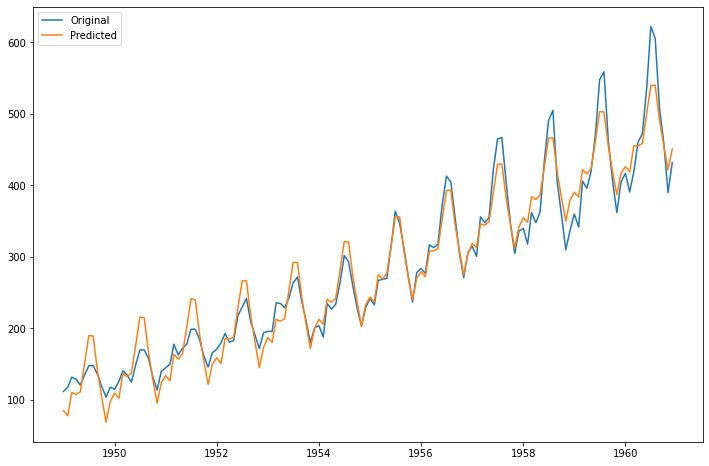

In [45]:
plt.plot(ts)
plt.plot(results[['ds','yhat']].set_index('ds'))
plt.legend(['Original', 'Predicted'])

In [46]:
train = ts[ts.index<'1960']

In [47]:
pr = Prophet()

In [48]:
pr.fit(train.reset_index().rename(columns={'fecha':'ds', 'passengers':'y'}))

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.41026


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      79       367.965    0.00189215       141.679   2.216e-05       0.001      142  LS failed, Hessian reset 
      99       368.079    2.9492e-05       69.7302       0.656       0.656      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       368.195    5.4452e-06       62.0005           1           1      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       368.195    7.9544e-09       72.3965      0.2416      0.2416      339   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


In [49]:
ts[ts.index>'1960']

fecha
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: passengers, dtype: int64

In [50]:
help(pr.predict)

Help on method predict in module prophet.forecaster:

predict(df=None) method of prophet.forecaster.Prophet instance
    Predict using the prophet model.
    
    Parameters
    ----------
    df: pd.DataFrame with dates for predictions (column ds), and capacity
        (column cap) if logistic growth. If not provided, predictions are
        made on the history.
    
    Returns
    -------
    A pd.DataFrame with the forecast components.



In [51]:
pd.DateTimeIndex

AttributeError: module 'pandas' has no attribute 'DateTimeIndex'

In [52]:
results = pr.predict(ts[ts.index>'1960'].reset_index().rename(columns={'fecha':'ds', 'passengers':'y'}))

In [53]:
df_pred = pd.DataFrame({'ds': pd.date_range('1961-01-01','1961-12-31', freq='MS')})

In [54]:
results = pr.predict(df_pred)

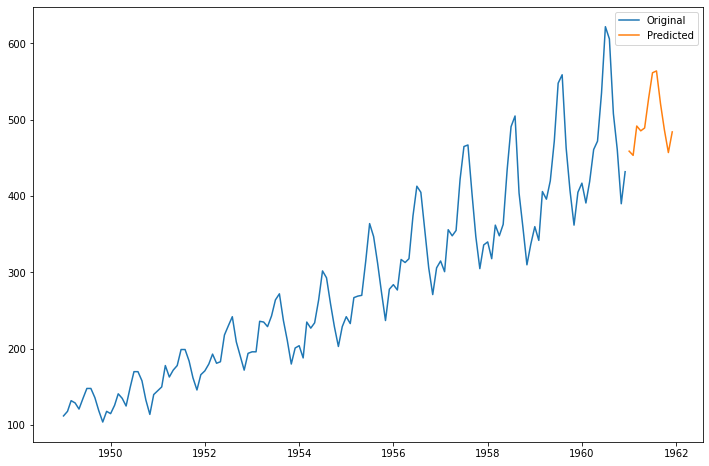

In [55]:
plt.plot(ts)
plt.plot(results[['ds','yhat']].set_index('ds'))
plt.legend(['Original', 'Predicted'])